# CSCI 3352 Biological Networks, Spring 2020, Prof. Clauset
Submit here: https://moodle.cs.colorado.edu/course/view.php?id=1273

# Problem Set 1 : Fundamentals of Networks

***

**Name**: Denver Chernin <br>
**Discussed with:** Julia Sanford

***

This assignment is due on Moodle by **11:55pm on Thursday, January 23rd**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 88 points total, and 15 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Moodle.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)
* [Tutorial for networkx](https://networkx.github.io/documentation/stable/tutorial.html)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [13]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Network warmup (33 pts total)

This problem gives you with practice performing basic operations on network data, using the `networkx` library. In order to answer these questions, you will need to search through the `networkx` online documentation to find appropriate functions. Some solutions will require you to write a little bit of your own code to process the input or output of those functions.

***
### Problem 1-A (5 pts)

Using `networkx`, load the assigned network data file as a simple graph, and then report the following:
* number of nodes $n$
* number of edges $m$
* mean degree $\langle k \rangle$

There are 3 network files provided. Enter your birthday in the format MMYY (drop leading 0) as `seed` and then work with the file the code snippet below tells you is yours.

In [14]:
import random
seed = 412

##### do not modify below here #####
random.seed(seed)
roll_the_dice = random.randint(1, 3)
if roll_the_dice == 1:
    print(f'Lucky you! Your file is karate.gml')
elif roll_the_dice == 2:
    print(f'Fantastic! Your file is grass_web.gml')
else:
    print(f'Exciting! Your file is yeast_spliceosome.gml')
##### do not modify above here #####

Fantastic! Your file is grass_web.gml


In [15]:
#creates an empty graph with no nodes or edges
gw_network = nx.Graph()

#populates our empty graph with the values from grass_web.gml
#added label = 'id' because the gml file has no attribute called label, but 
#has an attribute of 'id' that represents the node
gw_network = nx.read_gml("grass_web.gml", label = 'id') 

#outputs string with Name,Type,Nodes,Edges,Avg Degree all spaced out by \n which 
#allows me to split them individually and saving a list into attr for further parsing
attr = nx.info(gw_network).split('\n') 

#takes each node, degree, kmean index and splits it at the space to extract the number (-1 takes last index)
n, m , kmean = attr[2].split(' ')[-1], attr[3].split(' ')[-1], float(attr[4].split(' ')[-1])


##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)

number of nodes, n  = 75
number of edges, m  = 113
mean degree,    <k> =  3.01


***
### Problem 1-B (6 pts)

Use the drawing functions in `networkx` to visualize your network in 3 ways:
* `spring` layout
* `circular` layout
* `random` layout

Use the function `plt.show()` to show the layout itself, once you've built it using `networkx`.

Then, write a few sentences comparing the layouts. Briefly explain what, if anything, does each show well or not well.

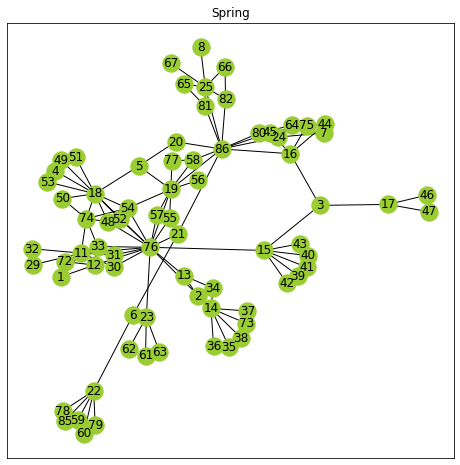

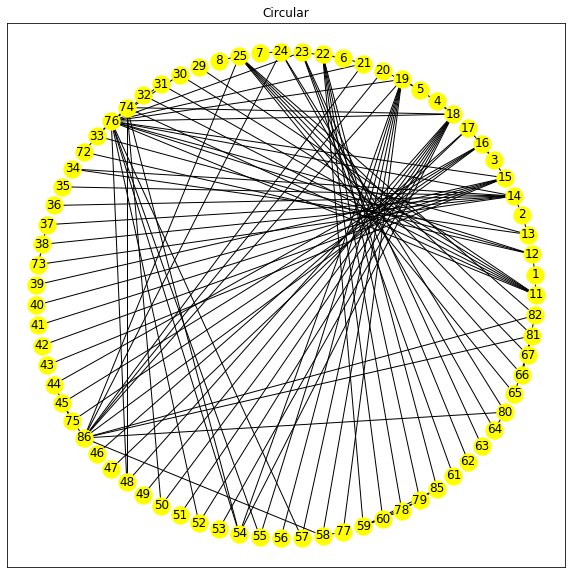

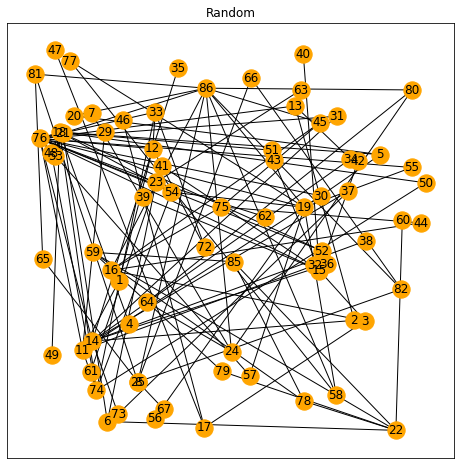

In [16]:
#SPRING
#sets the figure size to a more legible size
fig= plt.figure(figsize=(8,8))
#Position nodes using Fruchterman-Reingold force-directed algorithm
spring = nx.spring_layout(gw_network)
#Adding titles to make each graph distinguishable
plt.title("Spring")
#Using draw and plt to show network, altering size and color of nodes
plt.show(nx.draw_networkx(gw_network, spring, font_size=12, node_color='yellowgreen', node_size=300))

#CIRCULAR
#sets the figure size to a more legible size
fig= plt.figure(figsize=(10,10))
#Position nodes on a circle.
circular = nx.circular_layout(gw_network)
#Adding titles to make each graph distinguishable
plt.title("Circular")
#Using draw and plt to show network, altering size and color of nodes
plt.show(nx.draw_networkx(gw_network, circular, font_size=12, node_color='yellow', node_size=300))


#RANDOM 
#sets the figure size to a more legible size
fig= plt.figure(figsize=(8,8))
#Position nodes uniformly at random in the unit square.
rand = nx.random_layout(gw_network)
#Adding titles to make each graph distinguishable
plt.title("Random")
#Using draw and plt to show network, altering size and color of nodes
plt.show(nx.draw_networkx(gw_network, rand, font_size=12, node_color='orange', node_size=300))

**Spring Network**<br>
    This representation of the grass_web network has very few crossing edges making it easier to find connections between two nodes. This graph shows also good groupings on connected/related nodes.
    
**Circular Network**<br>
    The representation at its current size it is difficult to see the relationships between neighbor nodes as their edges are coverded by the circle itself. This layout does show the degree of interconnectedness between the nodes. 
    
**Random Network**<br>
    This representation of the grass_web network is extremely messy and difficult to read as well as analyze visually. To see the relationships between nodes in a network random graphs should not be used. It is hard to see connecting nodes and clusters of nodes too. 

***
### Problem 1-C (14 pts)

Using `networkx` functions, and any additional code you need to write, calculate and report the following network summary statistics:
* diameter $\ell_\max$
* mean geodesic path length $\langle \ell \rangle$
* clustering coefficient $C$ (aka, transitivity)
* number of connected components $h$
* maximum degree $k_{\rm max}$
* standard deviation of the degrees $\sigma_{k}$

Hint: the first four of these can be calculated using built-in functions from `networkx`; for the last two, you'll need to use the `.degrees(G)` function to obtain a dictionary of the degrees, and the process it yourself.

In [17]:
#Returns maximum eccentricity (largest distance from 1 node to another)
diameter = nx.diameter(gw_network)

#Return the average shortest path length
ellmean = nx.average_shortest_path_length(gw_network)

#Built-in clustering coeffcient --> how much do nodes cluster together
C = nx.transitivity(gw_network)

#Calculates all connected components
h = nx.number_connected_components(gw_network)

#creates a list of every degree for all nodes in our network, gw_network.degree() returns the node and the degree of 
#said node, I take just the degree and append it to a list
all_degrees = [d for (n, d) in gw_network.degree()]
kmax = max(all_degrees)

#Uses our already created list of degrees for each node and uses numerical
#python to calculate the standard deviation
kstd = np.std(all_degrees)


##### do not modify below here #####
print(f'diameter = {diameter}')
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'number of components,   h     =  {h}')
print(f'max degree, k_max = {kmax}')
print(f'max degree, k_std =%5.2f' % kstd)

diameter = 8
mean geodesic distance, <ell> =  3.87
clustering coefficient, C     =  0.17
number of components,   h     =  1
max degree, k_max = 17
max degree, k_std = 2.78


***
### Problem 1-E (8 pts)

Using the provided functions, make **four** plots of the degree distribution:
* a `bar` plot of the probability density function (PDF; aka, a simple histogram), showing $\Pr(k)$ vs. $k$
* a `semilogx` plot of the PDF, showing $\Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the PDF, showing $\log_{10} \Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the complementary cumulative distribution function (CCDF), showing $\log_{10} \Pr(K\geq k)$ vs. $\log_{10} k$

Then comment briefly on the aspects of the degree distribution's shape that each plot over- or under-emphasizes, or shows clearly.

In [18]:
def plot_PDFhist(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) as a simple histogram for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.bar(bins[1:-1], counts[1:], facecolor='r', alpha=0.5)    
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_PDFsemi(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on semi-log axes for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.semilogx(bins[1:-1], counts[1:], 'rs-', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_PDFloglog(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on semi-log axes for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.loglog(bins[1:-1], counts[1:], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

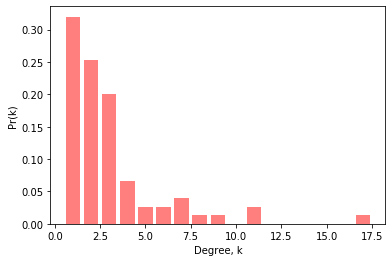

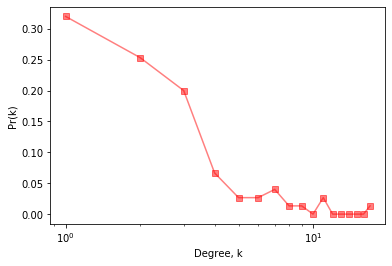

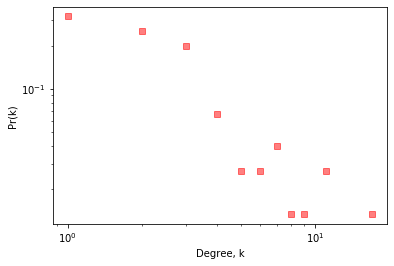

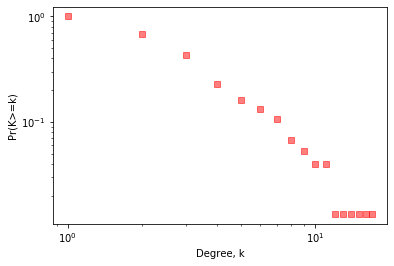

In [19]:
#using the all_degrees list that was created above and passing it to functions
plot_PDFhist(all_degrees)
plot_PDFsemi(all_degrees)
plot_PDFloglog(all_degrees)
plot_CCDF(all_degrees)

**Answer:** <br>

The **histogram** clearly shows the lower tail of the distribution and if the higher degrees were more frequent it would be harder to see. The histogram over-emphasizes the lower degree nodes while under-emphasizing the higher degree nodes. The **semilog** graph allows us to see more of the higher degree nodes. The **PDF loglog** plot over emphasizes the lower degree while making the higher nodes more compressed. This representation is still very chaotic towards the end of the distribution. The **CCDF loglog** plot has a smoother curve  allowing us to see what percentage of nodes have $\le$ k degree, but also can see the distribution of degrees much easier.

***
***
## Problem 2 : Graph properties (30 pts total)

Read each of the following written descriptions of a network data set. Then list in Markdown all applicable _graph properties_ that network has, from the following list.
* directed or undirected
* weighted or unweighted or signed
* bipartite
* temporal
* multiplex
* multigraph
* metadata

***
### Problem 2-A (5 pts)
A network of genes and the $k$-mers they contain, for some fixed choice of $k$ (e.g., $k=3$). Nodes are either the DNA sequence of a full gene or the sequence of a particular $k$-mer, and each gene is connected to all the $k$-mers it contains.

**Answer**: <br>
*Directed:* Each genes will have a directed edge to a k-mer that it contains <br>
*Bipartite:* Each gene will contain n-k-mers, but no k-mers can contain genes (two seperated types) <br>
<br>
*Multigraph:* The gene 'TCC' will contain multiple 'C' 1-mers meaning multiple edges needed <br>**OR**<br> *Weighted:* The weight being the number of k-mer nodes the gene contains 

***
### Problem 2-B (5 pts)
A network of proteins and their pairwise interactions. Each node is a protein, and a pair of nodes $i,j$ are connected if protein $i$ binds to protein $j$ _in vivo_. Edges are annotated with the corresponding (real-valued) binding affinity, and nodes are annotated with their molecular weight.

**Answer**: <br>
*Undirected:* Pairwise binding means (i,j) as well as (j,i) <br>
*Weighted:* Each edge has its binding affinity annotated <br>
*Metadata:* Each node has their own molecular weight <br>

***
### Problem 2-C (5 pts)
A sequence of network snapshots representing the spread over time of a communicable disease (e.g., influenza) through a human population. Every snapshot contains the same set of nodes, and the $t$-th snapshot contains all the edges that occurred in the real-time interval of $[t,t+1)$. Nodes are people, and two people $i,j$ are connected in the $t$-th snapshot if $j$ was infected by $i$ within the interval $[t,t+1)$. Nodes are annotated by the person's age and sex.

**Answer**: <br>
*Directed:* The network is directed because it shows the spread who spread the disease to whom <br>
*Unweighted:* The edges has no annoted value <br>
*Temporal:* It is temporal due to the fact the disease is spreading making our network not static. The edges and nodes will change over time as more and more people are infected <br>
*Metadata:* The network contains metadata which is information about a node such as age and sex <br>

***
### Problem 2-D (5 pts)
A gene regulatory network where nodes are genes, and an edge exists if gene $i$ regulates gene $j$, in two layers. Edges are annotated as being either an activation (layer 1) or an inhibition (layer 2) type of interaction. Genes are annotated by their [Gene Ontology](http://geneontology.org) (GO) functional class label.

**Answer**: <br>
*Directed:* If gene A regulates gene B that does not mean gene B regulates gene A <br>
*Unweighted:* Edges on individual layers just show regulation of certain genes <br>
*Multiplex:* This network is multiplex as it has different layouts for different interactions (activations vs inhibition) <br>
*Metadata:* Each node is annotated by their Gene Ontology functional class label

***
### Problem 2-E (5 pts)
A network of proteins in a signaling pathway. Each node is a protein, and a pair of nodes $i,j$ are connected if $i$ binds to $j$. Edges are annotated with the effect of the binding, either activation or inhibition.

**Answer**: <br>
*Directed:* Protein A will have a directed edge to protein B if it either activates or inhibits <br>
*Signed:* Each edge will -1 or +1 saying either activation or inhibition <br>

***
### Problem 2-F (5 pts)
A network of disease and gene associations, where nodes are either diseases or genes, and a disease $i$ and a gene $j$ are connected if $j$ is associated (in some way) with the incidence of $i$. Disease are annotated with various information about them, e.g., their name, treatment, symptoms list, etc., and genes are annotated with the DNA sequence.

**Answer**: <br>
*Directed:* If someone has gene j that will be associated with disease i, but if someone has disease i that doesn't mean they have gene j <br>
*Unweighted:* The edges are not annoted <br>
*Bipartite:* Two seperated groups (disease & genes) that have no same-type connections
*Metadata:* Each node (i, j) have information attached

***
***

## Problem 3 : Calculations by hand (25 pts total)

For each of the following networks, calculate by hand:
* maximum degree $k_{\rm max}$
* minimum degree $k_{\rm min}$
* clustering coefficient $C$ (transitivity)
* diameter $\ell_\max$

Do not use software to do these calculations. Explain each calculation and show your work in Markdown in the corresponding box below.

Hint: If a specific network is given, you may give your answers as numbers. If a family of networks is given (e.g., one in which the number of nodes $n$ is not specified), your answers should be in terms of the variables that parameterize the network (e.g., $n$).

***
### Problem 3-A (5 pts)
Let $G$ be a fully connected simple network, aka, a complete graph, with $n$ nodes.

$k_{\rm max}$ = **n - 1** <br>
$k_{\rm min}$ = **n - 1** <br>
$k_{max}$ and $k_{min}$ are the same because every node must be connected to every other node, but itself. Meaning for each node it will have to connect to n-1 other nodes

$C$ (transitivity)  = $\frac{2 * N}{K(K - 1)}$ but for complete graphs transtivity is *1* 


$\ell_\max$ = *1* because this measures the shortest path to the farthest vertex, but all vertices connect to all other so only one hop is needed<br>


***
### Problem 3-B (10 pts)

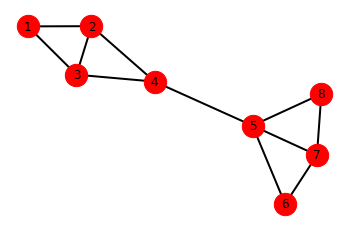

In [20]:
G = nx.Graph()          # empty graph data structure
# now, add a bunch of edges simultaneously
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,4), (4,5), (5,6), (5,7), (5,8), (6,7), (7,8)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

$k_{\rm max}$ = 4<br>
$k_{\rm min}$ = 2<br>
<br>
$C$ (transitivity) *Need to calculate for all nodes then avg* <br>
Node 1: $\frac{2 * 1}{2(2 - 1)}$ = $\frac{2}{2}$ = 1 <br>
Node 2: $\frac{2 * 2}{3(3 - 1)}$ = $\frac{4}{6}$ = $\frac{2}{3}$ <br>
Node 3: $\frac{2 * 2}{3(3 - 1)}$ = $\frac{4}{6}$ = $\frac{2}{3}$ <br>
Node 4: $\frac{2 * 1}{3(3 - 1)}$ = $\frac{2}{6}$ = $\frac{1}{3}$ <br>
Node 5: $\frac{2 * 2}{4(4 - 1)}$ = $\frac{4}{12}$ = $\frac{1}{3}$ <br>
Node 6: $\frac{2 * 1}{2(2 - 1)}$ = $\frac{2}{2}$ = 1 <br>
Node 7: $\frac{2 * 2}{3(3 - 1)}$ = $\frac{4}{6}$ = $\frac{2}{3}$ <br>
Node 8: $\frac{2 * 1}{2(2 - 1)}$ = $\frac{2}{2}$ = 1 <br>
C = $\frac{1 + \frac{2}{3} + \frac{2}{3} + \frac{1}{3} + \frac{1}{3} + 1 + \frac{2}{3} + 1}{8}$ = $\frac{17}{24}$ = 0.708 <br> <br>
$\ell_\max$  = 4 - this is the longest of all shortest paths between two nodes<br>

***
### Problem 3-C (5 pts)
Let $G$ be a _perfect_ binary tree containing $n$ nodes. Hint: how many nodes $n$ does a perfect binary tree contain, for depth $d=0,1,2,\dots$

(*extra credit*) Calculate the mean degree $\langle k \rangle$.

$k_{\rm max}$ = 2 - node has two children <br>
$k_{\rm min}$ = 1 - leaf has connection to its parent<br> <br>
$C (Transivity)$ = *0* because there are no connections between nodes on the same depth thus the numerator of the above (2 * N) will always be zero. <br> <br>
$\ell_\max$  = For a binary tree this would be the path connecting the edges of the leafs which would have to traverse up to the root and down the other side leaving us with an $\ell_\max = 2log(n)$<br>

***
### Problem 3-D (5 pts)
Let $G$ be a simple "ring" network with $n$ nodes, in which nodes are arranged in a line, each one connecting only to its immediate neighbors to the left and right, except for the nodes at the beginning and end of the line, which connect to each other. Below is an example for $n=6$, but state your answers for the general case of $n>0$.

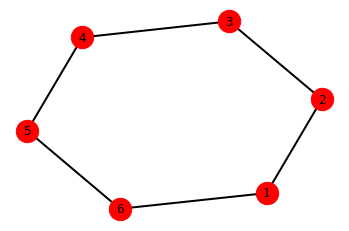

In [21]:
G = nx.Graph()          # empty graph data structur
G.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

$k_{\rm max}$ = 2 - node has left and right neighbors <br>
$k_{\rm min}$ = 2 - node has left and right neighbors <br> <br>
$C (Transivity)$ = $\begin{cases}
    1 & \text{if n = 3}\\
    0 & \text{if n } \neq \text{3}
\end{cases}$ <br>
This is beause if N = 3 you have a triangle which is a clique and cliques have transitivities of 1. When N is not 3 it creates a ring where no neighbors of a node ever connect meaning the numerator will be 0. <br> <br>

$\ell_\max$  = floor($\frac{n}{2}$) - the floor is necessary for when n is odd. In the example above it would be 3 as it is (n/2) --> if a node was added between 5 and 6 n would become 7 and 7/2 = 3.5 you would need to go a little less than 1/2 way around the circle instead of over halfway <br>

***
***

## Problem 4 : Reading the literature (*10pts extra credit*)

Choose a paper from the [Supplemental Reading list on the external course webpage](http://tuvalu.santafe.edu/~aaronc/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.


**I read: *Organization of feed-forward loop motifs reveals architectural principles in natural and engineered networks***

* *What was the research question?*<br/>
The research question addressed in this paper is how the internal connections within motifs (specifically FFLs) and connections between motifs contributes to larger structures and functioning. They want to find a way to quantify connection types and find rules that govern them. 
<br/>

* *What was the approach the authors took to answer that question?*<br/>
The authors started by calculating clustering coefficients for motifs in networks and then categorized motifs into twelve types that each can represent a different type of informational flow. The authors then calculated node spin and looked for patterns in 10 different networks. To cancel out the possibility that these motifs are the results of randomness they showed that motifs found real-world networks could not be recreated in random networks.
<br/>

* *What did they do well?*<br/>
The authors made sure to address all concerns and biases that are shown in these networks. Such as addressing that ADP and ATP bind metabolism together and that addressing random graphs.  
<br/>

* *What could they have done better?*<br/>
The authors barely talked about the applications their work can used for. They showed how their work was able to predict the important nodes in the metabolic network of E coli, but failed to further explain implementations of their work. It was shown that most real-world networks contain significant motifs and it would have been nice to hear about further applications in science, medicine, biology, etc. 
<br/>

* *What extensions can you envision?*<br/>
Since majority of real-world networks contain these significant motifs that ultimately give it structure and function I find the understanding of these motifs critical to the advancement of cognitive science. Being able to under the smallest functioning unit of a network will allow engineers to create more real-world-esque networks for artificial intelligence and robotics. 